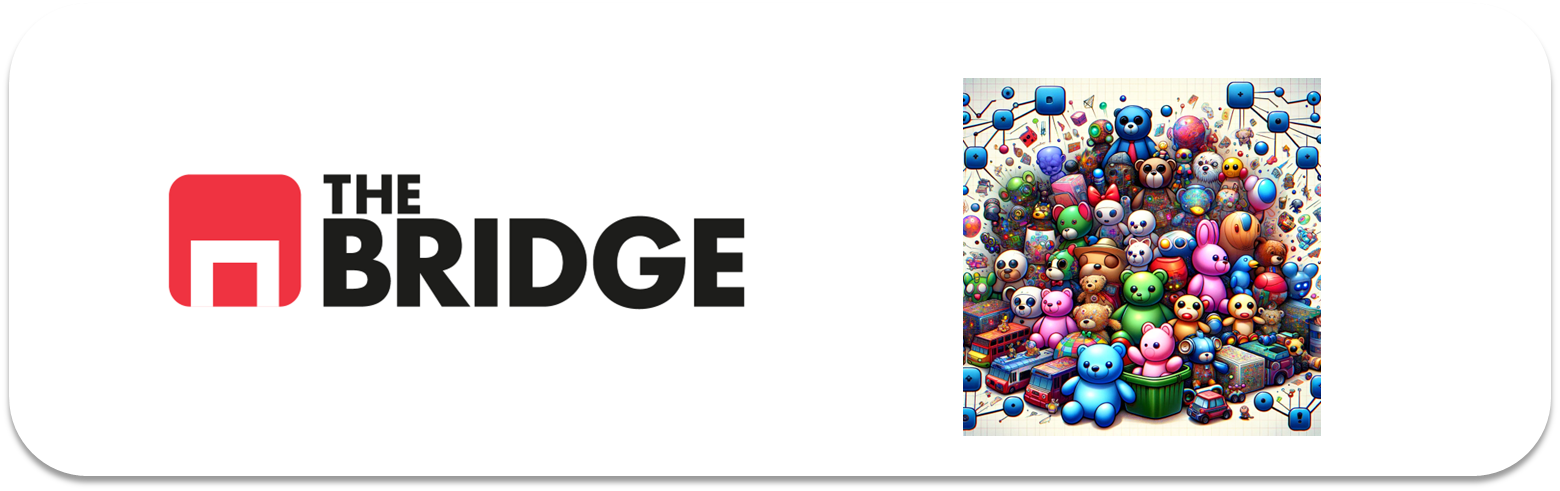

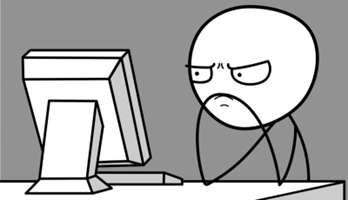

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bootcampviztools as bt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [103]:
# 1 Entender el problema. Es un claro ejemplo de analisis no supervisado ya que desconocemos las valoraciones de las mezclas. 
# 
# El cliente espera obtener entre 3 a 5 tipos de segmentos de bebida. 
# 
# Como se quiere conocer la relacion entre segmentaciones es claro que el modelo que apunta es Clustering jerarquico, aunque tambien nos piden usar DBSCAN que es un tipo de clustering no jerarquico.

In [104]:
# 2 Cargar datos, visualizar
df = pd.read_csv("./data/empowering_drinks.csv", sep="|")
df.head()

Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
0  1.518613               0.232053  1.034819       1.013009  0.251717
1  0.246290              -0.827996  0.733629       0.965242 -0.293321
2  0.196879               1.109334  1.215533       1.395148  0.269020
3  1.691550               0.487926  1.466525       2.334574  1.186068
4  0.295700               1.840403  0.663351      -0.037874 -0.319276

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [106]:
df.describe() # estan standarizados media 0 y standar 1

Azúcares  Vitamínas del grupo B     Cafeína  Ácido Cítrico  \
count  153.000000             153.000000  153.000000     153.000000   
mean     0.019231               0.037273    0.041057       0.080022   
std      1.026182               0.995984    1.040928       1.009450   
min     -2.434235              -3.679162   -1.695971      -1.493188   
25%     -0.816038              -0.499016   -1.043392      -0.738463   
50%      0.061000              -0.023821    0.211566      -0.165254   
75%      0.876275               0.707247    0.894264       0.917474   
max      2.259772               3.156325    3.062832       2.971473   

          Taurina  
count  153.000000  
mean    -0.044088  
std      0.934399  
min     -1.634288  
25%     -0.799428  
50%     -0.154899  
75%      0.493956  
max      2.431870

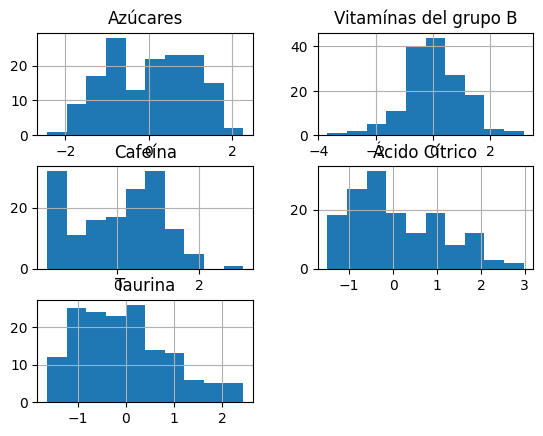

In [107]:
# Mini Eda: selección de features
df.hist()
plt.tight_layout;

(5, 2)


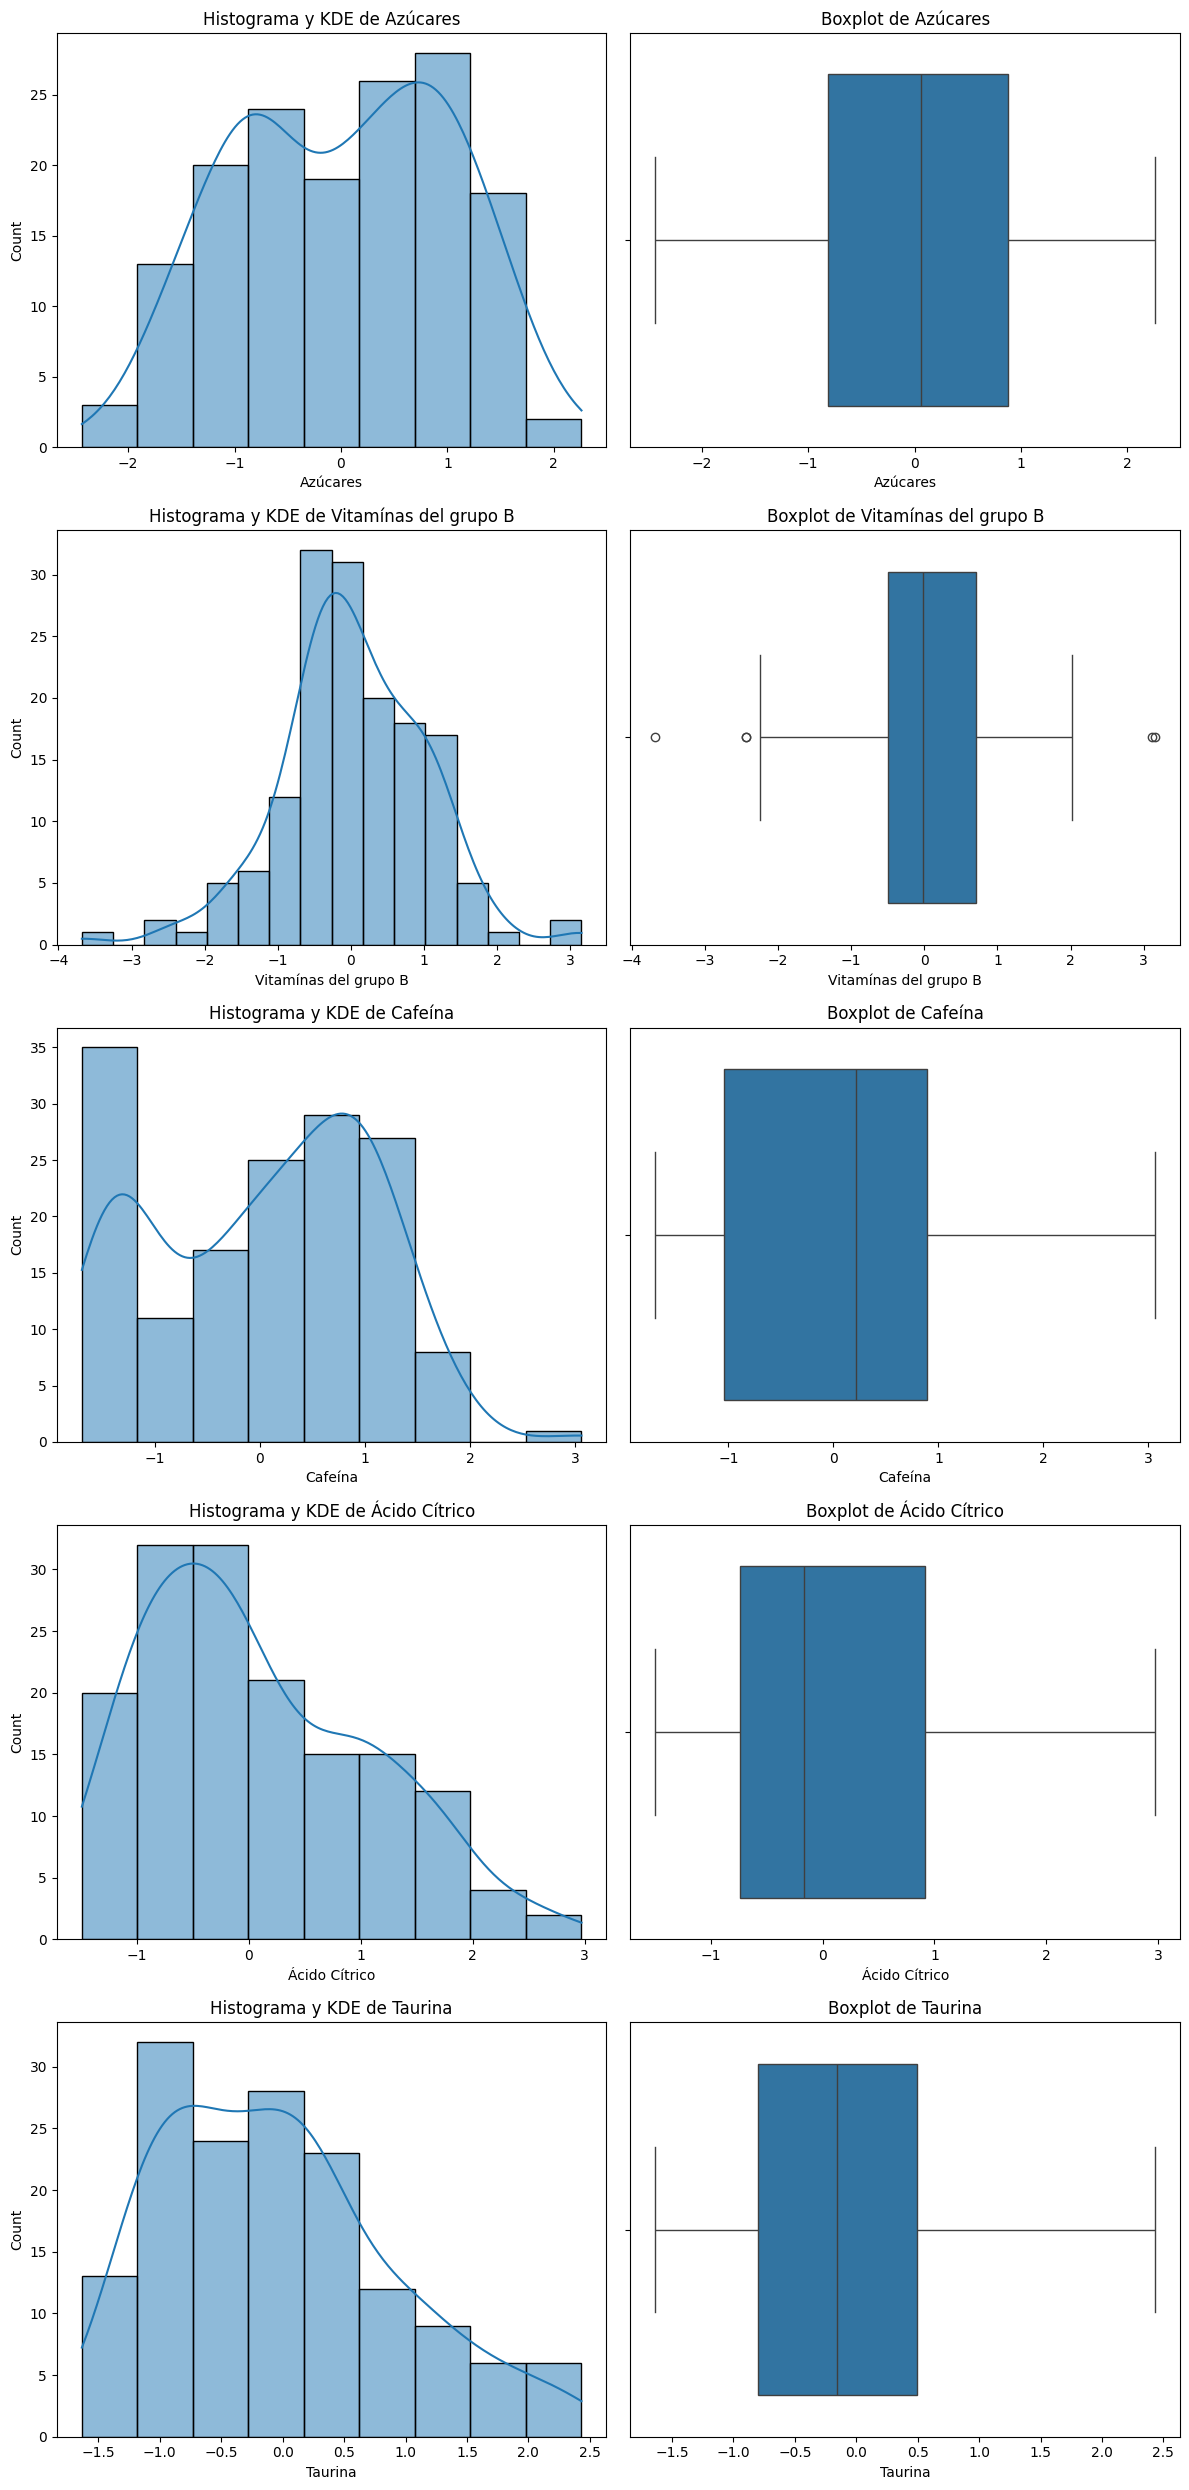

In [108]:
features_num = df.columns

bt.plot_combined_graphs(df, features_num)

In [109]:
#Se detectan otliers en vitaminas B

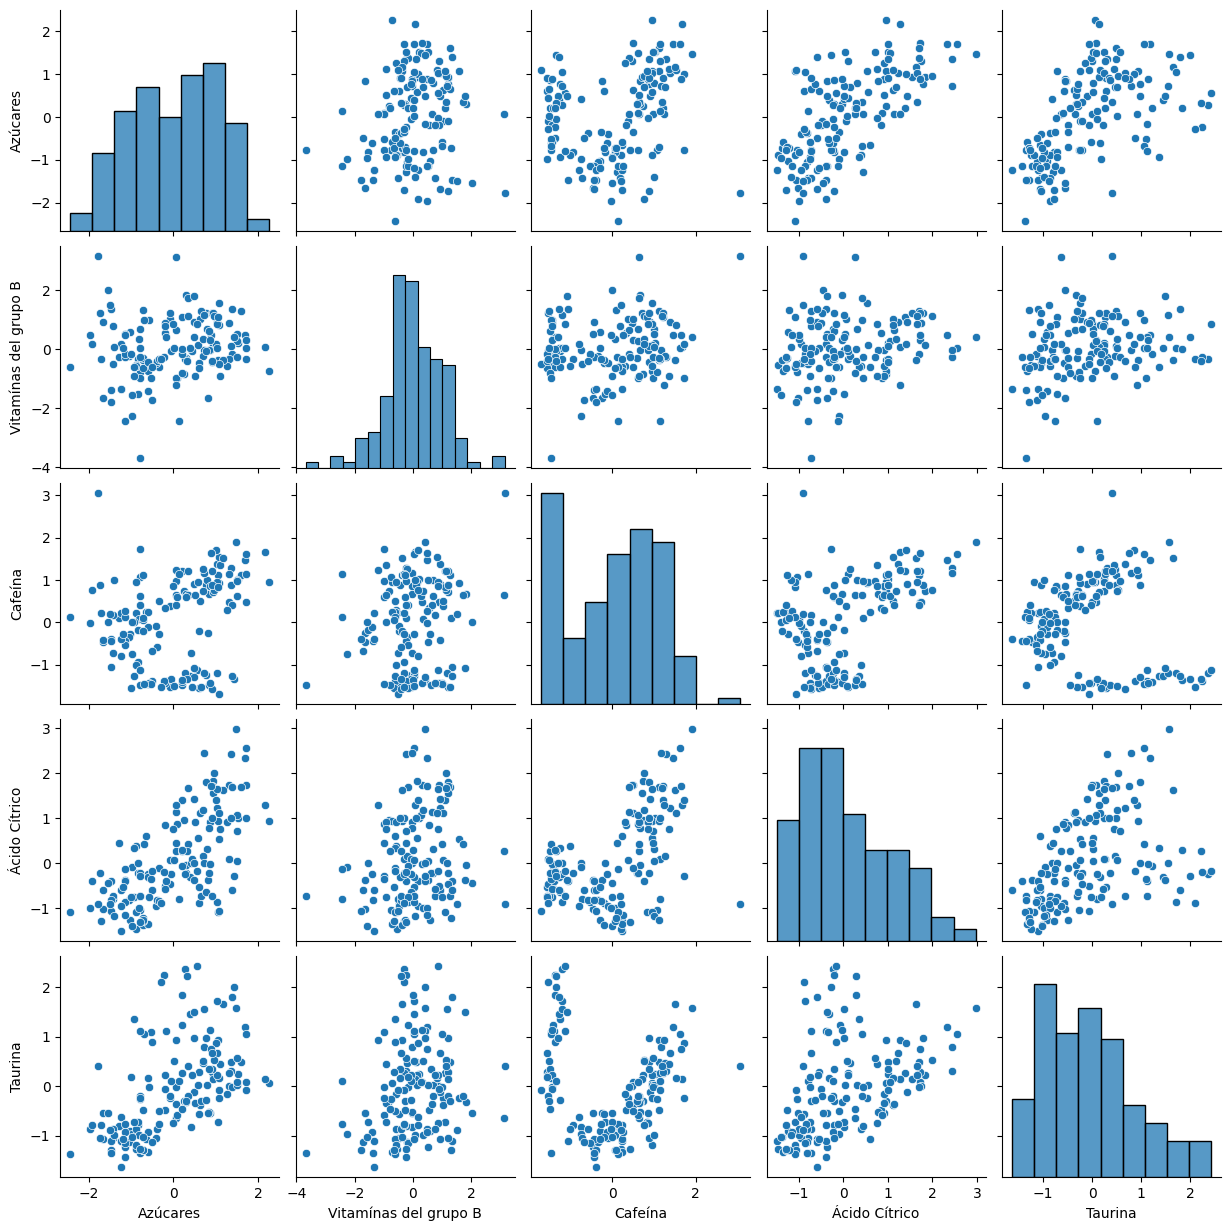

In [110]:
sns.pairplot(df)

In [111]:
# Se ven grupos claros en cafeina y taurina, y azucares y cafeina. acido citrico y cafeina....., parece que Vitaminas del grupo B no hay segmentaciones claras...

In [112]:
# for valores in combinations(train_set.columns, r = 2) itertools


In [113]:
#for x,y in combinations(tra)

In [114]:
features = features_num.drop("Vitamínas del grupo B")
features

Index(['Azúcares', 'Cafeína', 'Ácido Cítrico', 'Taurina'], dtype='object')

In [115]:
# 4 Tratamiento features

df_copia = df



In [116]:
#5 Seleccion de modelos y seleccion de parametros (DBSCAN): 

X = df_copia



# Creación de una instancia de DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Ajuste del modelo a los datos
dbscan.fit(X)

# Las etiquetas de los clusters están disponibles en `dbscan.labels_`
labels = dbscan.labels_
print(np.unique(dbscan.labels_))

[-1]


In [117]:
outlier_percent = []
experiments = {}
for min_samples in [3,5,10]:
    print(f"Min_samples = {min_samples}")
    outlier_percent = []
    for eps in np.linspace(0.001,6,100): # Genera 100 valores equidistantes entre 0.001 y 6      
        # Creamos el modelo
        dbscan = DBSCAN(eps=eps,min_samples=min_samples) # min_samples dos veces el ´numero de features -> 2 por dimensión del hiperespacio en el que representamos el conjunto de puntos... No le des muchas vueltas es un número muy orientativo. Pero piensa que si fuera un recta querrías 2 valores, un plano 4, un cubo 6...
        dbscan.fit(train_set)
        # Registramos el porcentaje de anomalías (recuerda que se etiquetan como -1)
        perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
        #if perc_outliers <= 10:
        #    print(perc_outliers, dbscan.labels_)
        #    print(len(dbscan.labels_))
        #    print(pd.Series(dbscan.labels_).value_counts())
        outlier_percent.append(perc_outliers)
    experiments[min_samples] = outlier_percent.copy()

Min_samples = 3


NameError: name 'train_set' is not defined

In [ ]:
for min_samples in [3,5,10]:
    #Vamos a pintar ahora el porcentaje de anomalías vs el valor de eps probado
    plt.figure(figsize = (8,4), dpi = 100)
    sns.lineplot(x=np.linspace(0.001,6,100),y=experiments[min_samples])
    plt.ylabel("Porcentaje de Anomalías")
    plt.xlabel("Valor de épsilon")
    plt.title(f"Vecinos minimos (min_samples) = {min_samples}")
    plt.show()

In [ ]:
for min_samples in [3,5,10]:
    print(f"Para num_samples = {min_samples}:")
    for indice,valor in enumerate(np.linspace(0.001,6,100)):
        if 1.2 <= valor <= 2:
            print(f"{valor} -> {experiments[min_samples][indice]}")

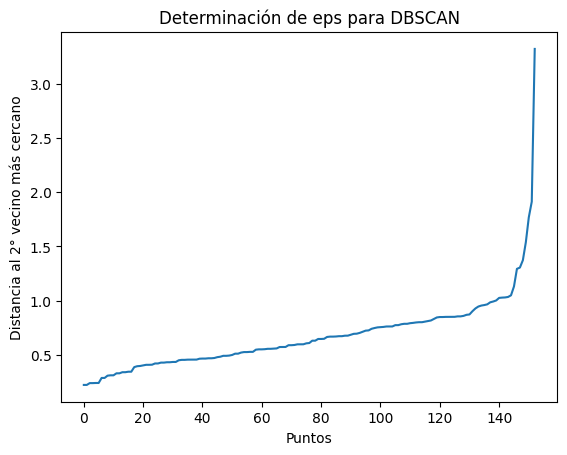

In [62]:
#Paramentros optimos para DBSCAN:


neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Puntos')
plt.ylabel('Distancia al 2° vecino más cercano')
plt.title('Determinación de eps para DBSCAN')
plt.show()

In [63]:
# 6. Entrenamiento y resultados:
# Creación de una instancia de DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)

# Ajuste del modelo a los datos
dbscan.fit(X)

# Las etiquetas de los clusters están disponibles en `dbscan.labels_`
labels = dbscan.labels_

print(np.unique(dbscan.labels_))

[-1  0  1  2]


In [64]:
df_copia["label DBSCAN"]=labels

# Contar las etiquetas únicas
df_copia['label DBSCAN'].value_counts()





label DBSCAN
 0    49
 1    42
 2    34
-1    28
Name: count, dtype: int64

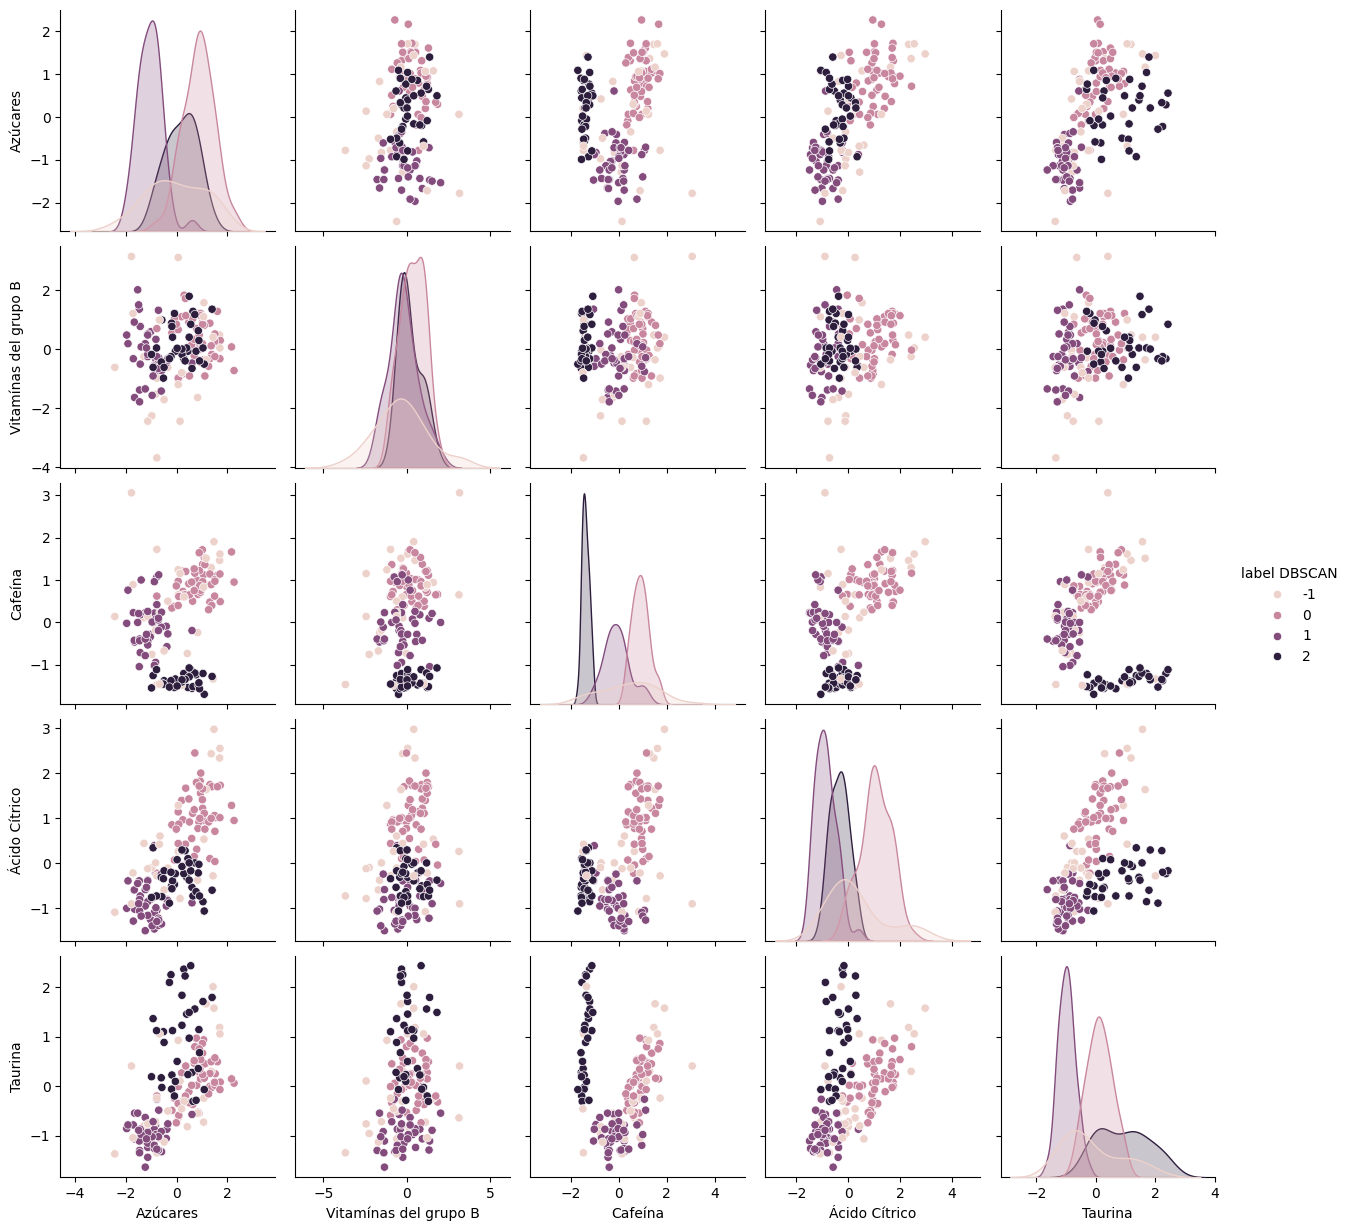

In [65]:
sns.pairplot(df_copia, hue="label DBSCAN");

In [66]:
#5 Seleccion de modelos y seleccion de parametros (Clustering jerarquico):


# Creación de una instancia de Clustering Aglomerativo
agg_clust = AgglomerativeClustering(n_clusters=5)

# Ajuste del modelo a los datos
agg_clust.fit(X)

# Las etiquetas de los clusters se encuentran en `agg_clust.labels_`
labels_2 = agg_clust.labels_

print(np.unique(labels_2))


[0 1 2 3 4]


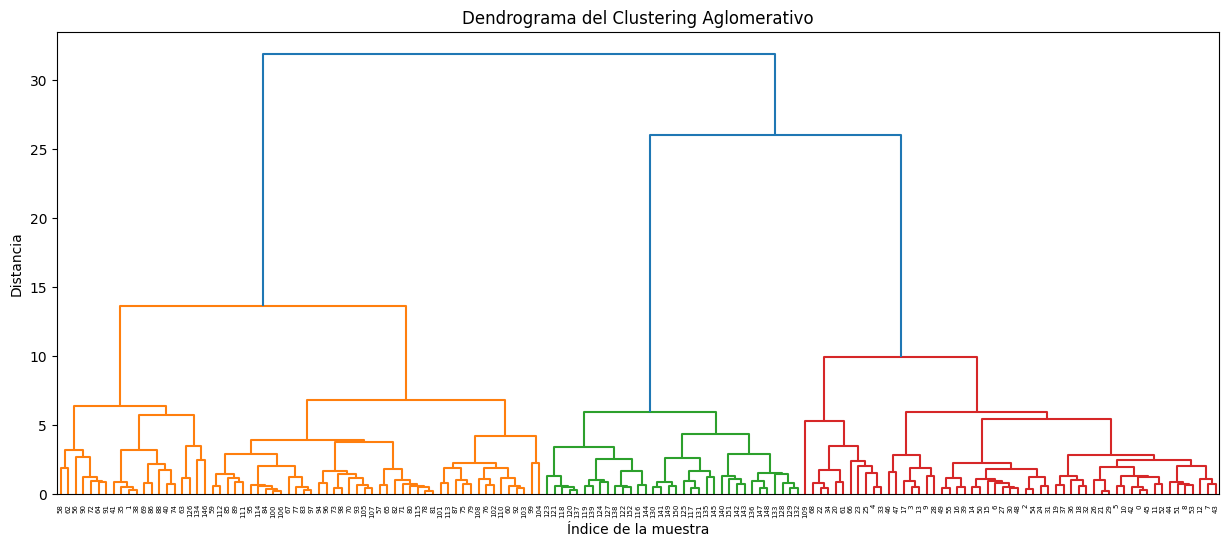

In [ ]:


# Cálculo de la matriz de enlace
Z = linkage(X, method='ward') # Ajustar 'method' según el criterio de enlace deseado

# Dibujar el dendrograma
plt.figure(figsize=(15, 6))
dendrogram(Z)
plt.title('Dendrograma del Clustering Aglomerativo')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
plt.show()

In [68]:
df_copia["label_cg_5"]=labels_2

# Contar las etiquetas únicas
df_copia['label_cg_5'].value_counts()

label_cg_5
3    44
0    44
2    34
1    20
4    11
Name: count, dtype: int64

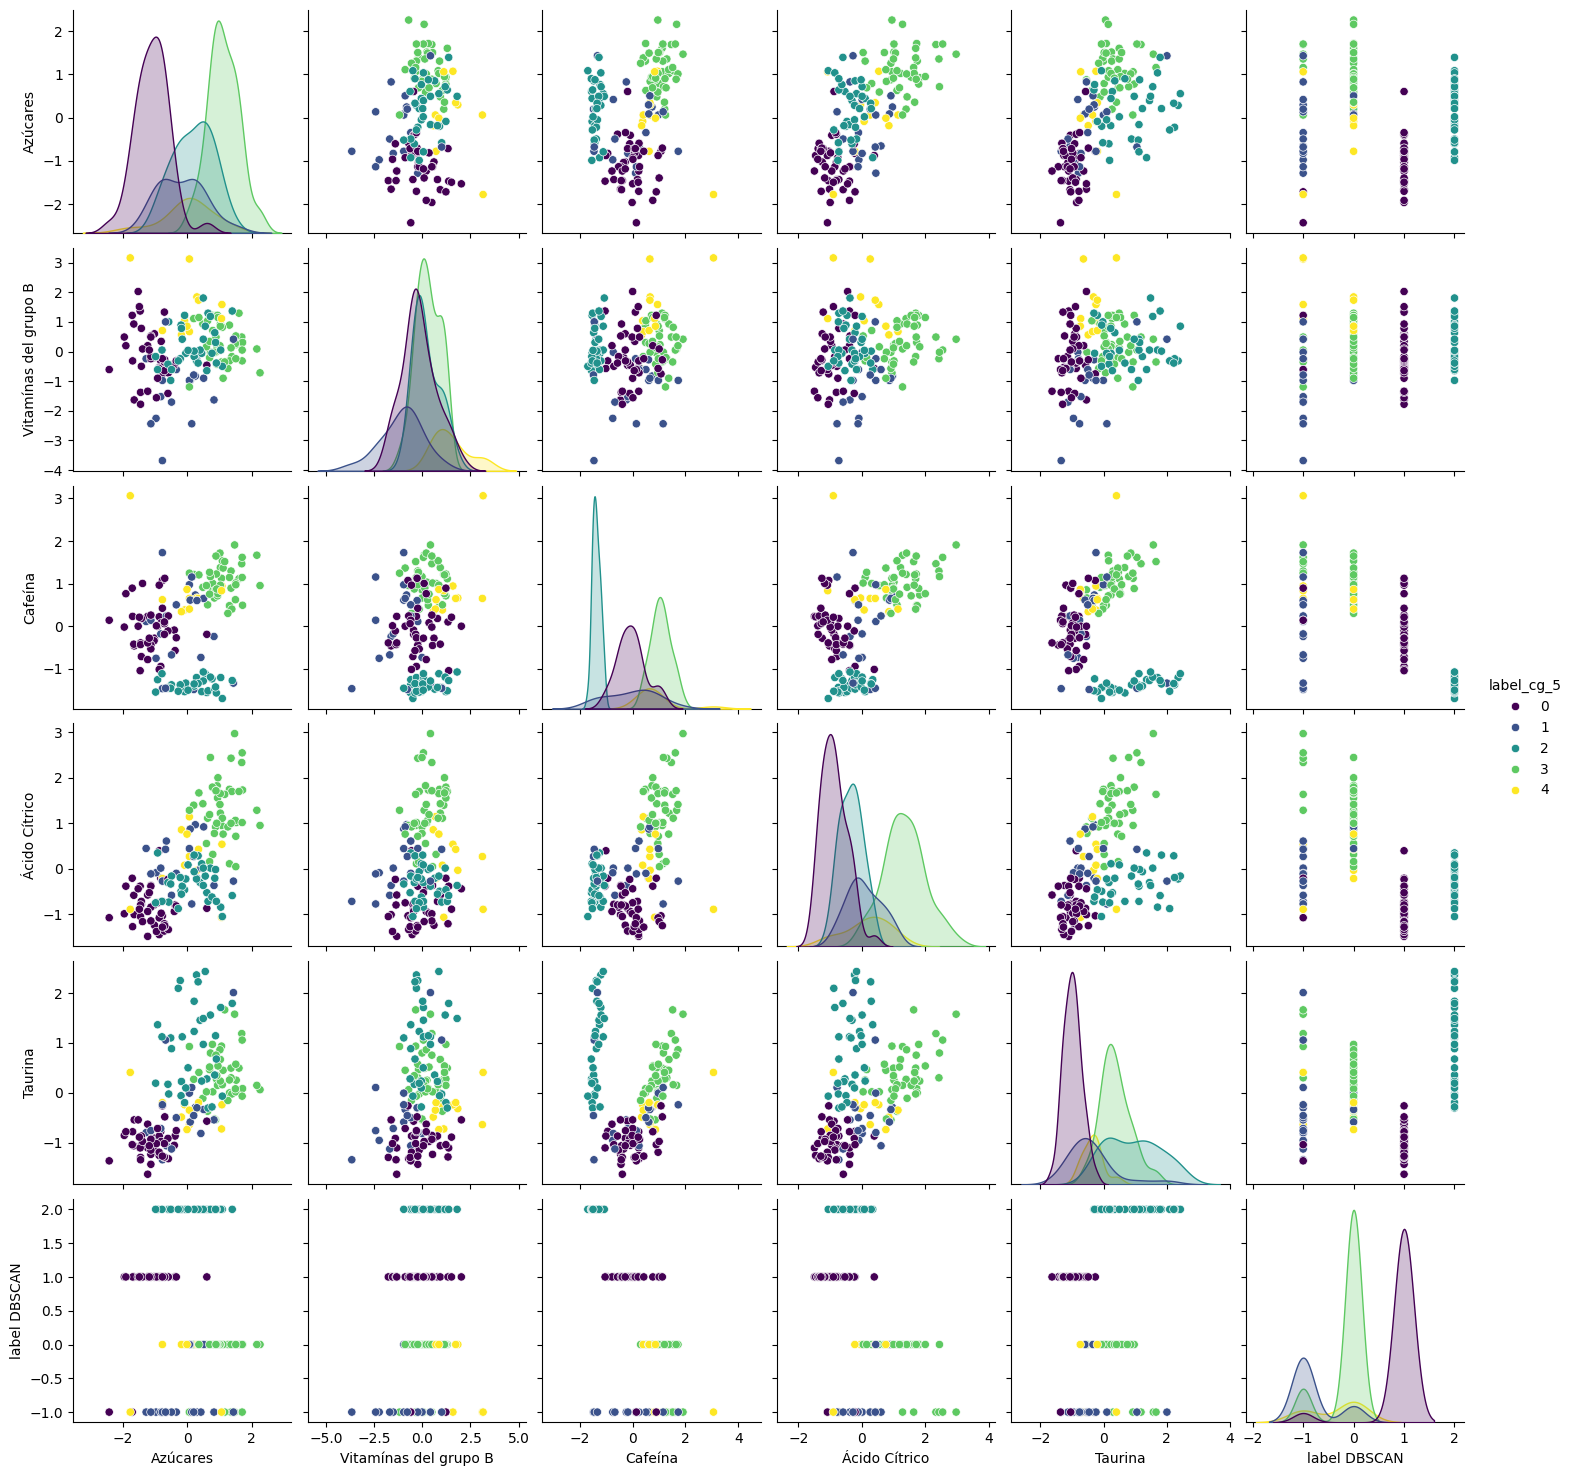

In [69]:
sns.pairplot(df_copia, hue="label_cg_5", palette="viridis");

In [81]:
# Creación de una instancia de Clustering Aglomerativo
agg_clust = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")

# Ajuste del modelo a los datos
agg_clust.fit(X)

# Las etiquetas de los clusters se encuentran en `agg_clust.labels_`
labels_3 = agg_clust.labels_


In [ ]:
df_copia["label_cg_3"]=labels_3

# Contar las etiquetas únicas
df_copia['label_cg_3'].value_counts()

label_cg_3
0    64
1    55
2    34
Name: count, dtype: int64

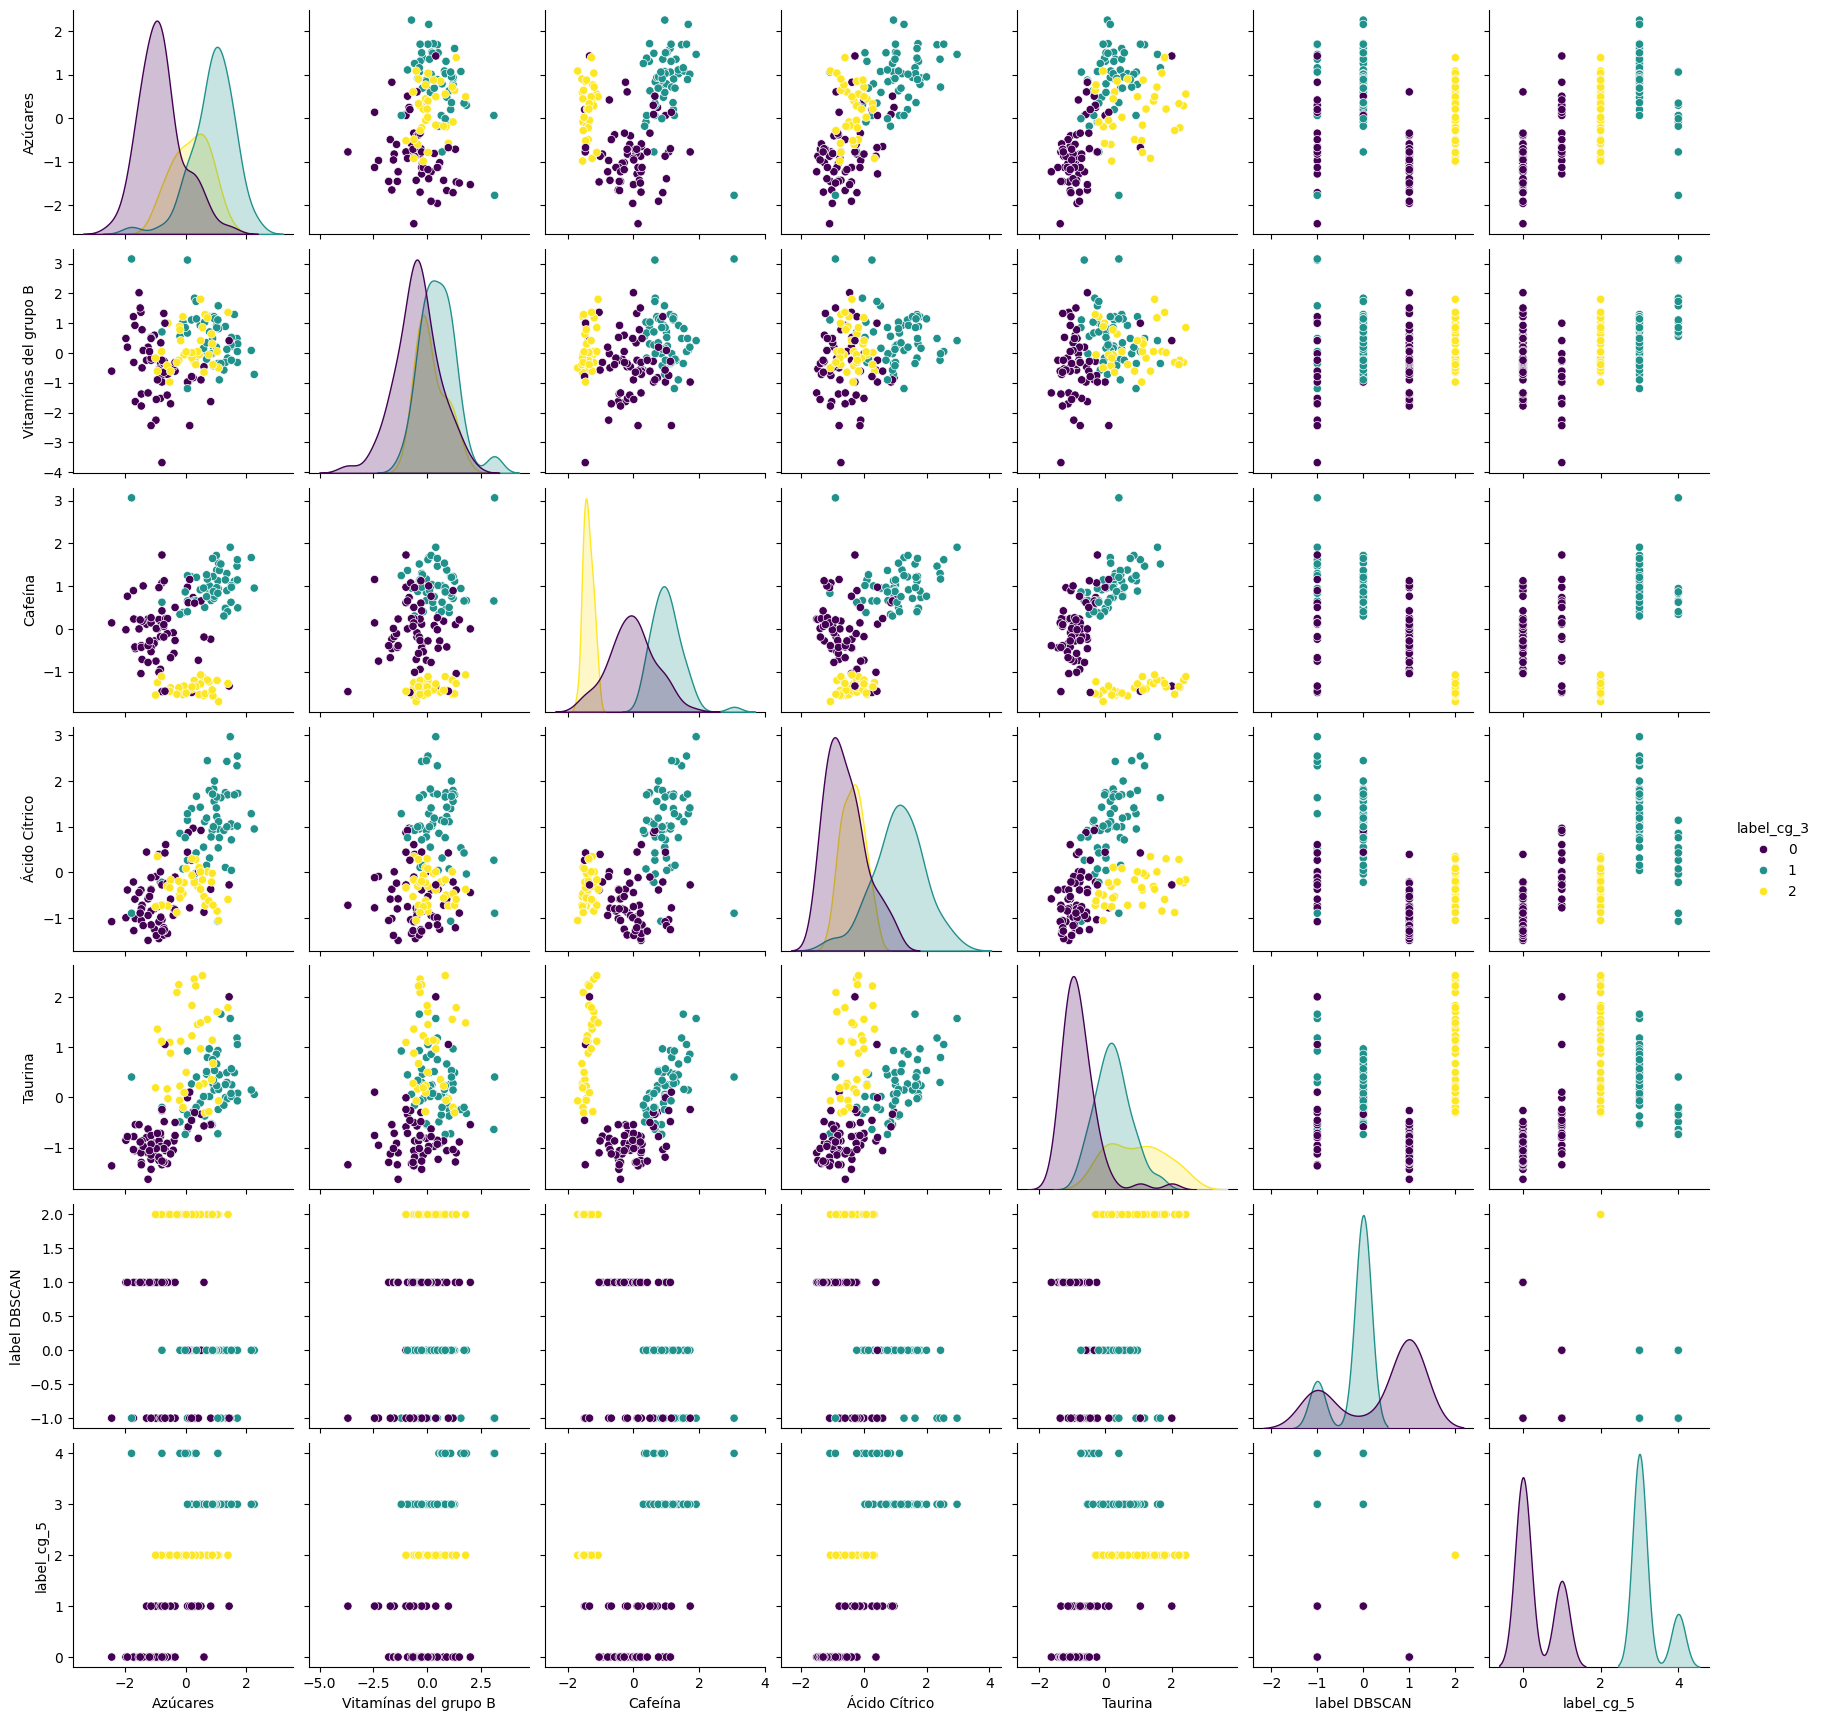

In [ ]:
sns.pairplot(df_copia, hue="label_cg_3", palette="viridis");

In [73]:
df_copia

Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina  \
0    1.518613               0.232053  1.034819       1.013009  0.251717   
1    0.246290              -0.827996  0.733629       0.965242 -0.293321   
2    0.196879               1.109334  1.215533       1.395148  0.269020   
3    1.691550               0.487926  1.466525       2.334574  1.186068   
4    0.295700               1.840403  0.663351      -0.037874 -0.319276   
..        ...                    ...       ...            ...       ...   
148  0.493343               0.414820 -1.284344       0.009893  0.969783   
149  0.332758              -0.389355 -1.344582       0.280575  2.224236   
150  0.209232               0.012732 -1.354622       0.296498  1.834923   
151  1.395086               1.365208 -1.274305      -0.595160  1.791666   
152  0.019564               0.039106 -1.500000       0.081020  0.500000   

     label DBSCAN  label_cg_5  label_cg_3  
0               0           3           1  
1               0           1           0  
2               0           3           1  
3              -1           3           1  
4               0           4           1  
..            ...         ...         ...  
148             2           2           2  
149             2           2           2  
150             2           2           2  
151             2           2           2  
152             2           2           2  

[153 rows x 8 columns]

In [74]:
# Con el metodo DSBCAN tenemos muchos anomalias por lo que no lo recomendamos para el estudio.
# Con el metodo clustering jerarquico, consideramos que lo mas optimo son hacer 3 segmentos y el grupo 2 es el mas claramente diferenciado por azucares, cafeina y taurina.

### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [118]:
# 2 Cargar datos, visualizar
df_2 = pd.read_csv("./data/new_experiments.csv", sep="|")
df_2

Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
0  1.481555               0.305159  1.366128       2.239039  0.731870
1  0.616869               0.890014  0.583034       0.312420 -0.665332
2 -1.680724               0.341713 -0.340615      -0.213021 -0.976782
3 -0.284874              -1.412851 -0.782361      -1.193845 -0.717240
4 -0.927212               0.634140 -1.565455      -0.085641 -0.522583
5  0.962743              -0.243142 -1.354622      -0.420013  1.956043

In [119]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               6 non-null      float64
 1   Vitamínas del grupo B  6 non-null      float64
 2   Cafeína                6 non-null      float64
 3   Ácido Cítrico          6 non-null      float64
 4   Taurina                6 non-null      float64
dtypes: float64(5)
memory usage: 372.0 bytes


In [120]:
df

Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
0    1.518613               0.232053  1.034819       1.013009  0.251717
1    0.246290              -0.827996  0.733629       0.965242 -0.293321
2    0.196879               1.109334  1.215533       1.395148  0.269020
3    1.691550               0.487926  1.466525       2.334574  1.186068
4    0.295700               1.840403  0.663351      -0.037874 -0.319276
..        ...                    ...       ...            ...       ...
148  0.493343               0.414820 -1.284344       0.009893  0.969783
149  0.332758              -0.389355 -1.344582       0.280575  2.224236
150  0.209232               0.012732 -1.354622       0.296498  1.834923
151  1.395086               1.365208 -1.274305      -0.595160  1.791666
152  0.019564               0.039106 -1.500000       0.081020  0.500000

[153 rows x 5 columns]

In [121]:
df_new = pd.concat([df, df_2], ignore_index=True)
df_new

Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
0    1.518613               0.232053  1.034819       1.013009  0.251717
1    0.246290              -0.827996  0.733629       0.965242 -0.293321
2    0.196879               1.109334  1.215533       1.395148  0.269020
3    1.691550               0.487926  1.466525       2.334574  1.186068
4    0.295700               1.840403  0.663351      -0.037874 -0.319276
..        ...                    ...       ...            ...       ...
154  0.616869               0.890014  0.583034       0.312420 -0.665332
155 -1.680724               0.341713 -0.340615      -0.213021 -0.976782
156 -0.284874              -1.412851 -0.782361      -1.193845 -0.717240
157 -0.927212               0.634140 -1.565455      -0.085641 -0.522583
158  0.962743              -0.243142 -1.354622      -0.420013  1.956043

[159 rows x 5 columns]

In [122]:
#features = features_num.drop("Vitamínas del grupo B")

df_new_copia = df_new.copy()

# Escalar las columnas numéricas
scaler = StandardScaler() 
df_new_copia[features_num] = scaler.fit_transform(df_new_copia[features_num])

X_new = df_new_copia


# Creación de una instancia de Clustering Aglomerativo
agg_clust = AgglomerativeClustering(n_clusters=3)

# Ajuste del modelo a los datos
agg_clust.fit(X_new)

# Las etiquetas de los clusters se encuentran en `agg_clust.labels_`
labels_3_new = agg_clust.labels_

df_new_copia["label_cg_3_new"]=labels_3_new

df_new_copia[153:]


Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina  \
153  1.425147               0.270153  1.287922       2.140670  0.828681   
154  0.582253               0.864021  0.535144       0.229540 -0.664309   
155 -1.657439               0.307270 -0.352748      -0.291678 -0.997111   
156 -0.296766              -1.474333 -0.777393      -1.264617 -0.719776   
157 -0.922916               0.604204 -1.530171      -0.165322 -0.511774   
158  0.919410              -0.286598 -1.327500      -0.497006  2.136780   

     label_cg_3_new  
153               1  
154               1  
155               0  
156               0  
157               2  
158               2

### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.

In [123]:
df_3 = pd.read_csv("./data/power_results.csv", sep="|")
df_3

class
0        1
1        1
2        1
3        1
4        1
..     ...
154      1
155      2
156      2
157      3
158      3

[159 rows x 1 columns]

In [124]:
df_final = df_new_copia
df_final["energizacion"]= df_3
df_final

Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina  \
0    1.461271               0.195920  0.969439       0.924496  0.315610   
1    0.221012              -0.880465  0.679909       0.877113 -0.266794   
2    0.172847               1.086722  1.143157       1.303563  0.334099   
3    1.629850               0.455737  1.384432       2.235437  1.314018   
4    0.269178               1.829056  0.612352      -0.117939 -0.294528   
..        ...                    ...       ...            ...       ...   
154  0.582253               0.864021  0.535144       0.229540 -0.664309   
155 -1.657439               0.307270 -0.352748      -0.291678 -0.997111   
156 -0.296766              -1.474333 -0.777393      -1.264617 -0.719776   
157 -0.922916               0.604204 -1.530171      -0.165322 -0.511774   
158  0.919410              -0.286598 -1.327500      -0.497006  2.136780   

     label_cg_3_new  energizacion  
0                 1             1  
1                 1             1  
2                 1             1  
3                 1             1  
4                 1             1  
..              ...           ...  
154               1             1  
155               0             2  
156               0             2  
157               2             3  
158               2             3  

[159 rows x 7 columns]

In [125]:
df_final["energizacion"].value_counts()

energizacion
2    62
1    58
3    39
Name: count, dtype: int64

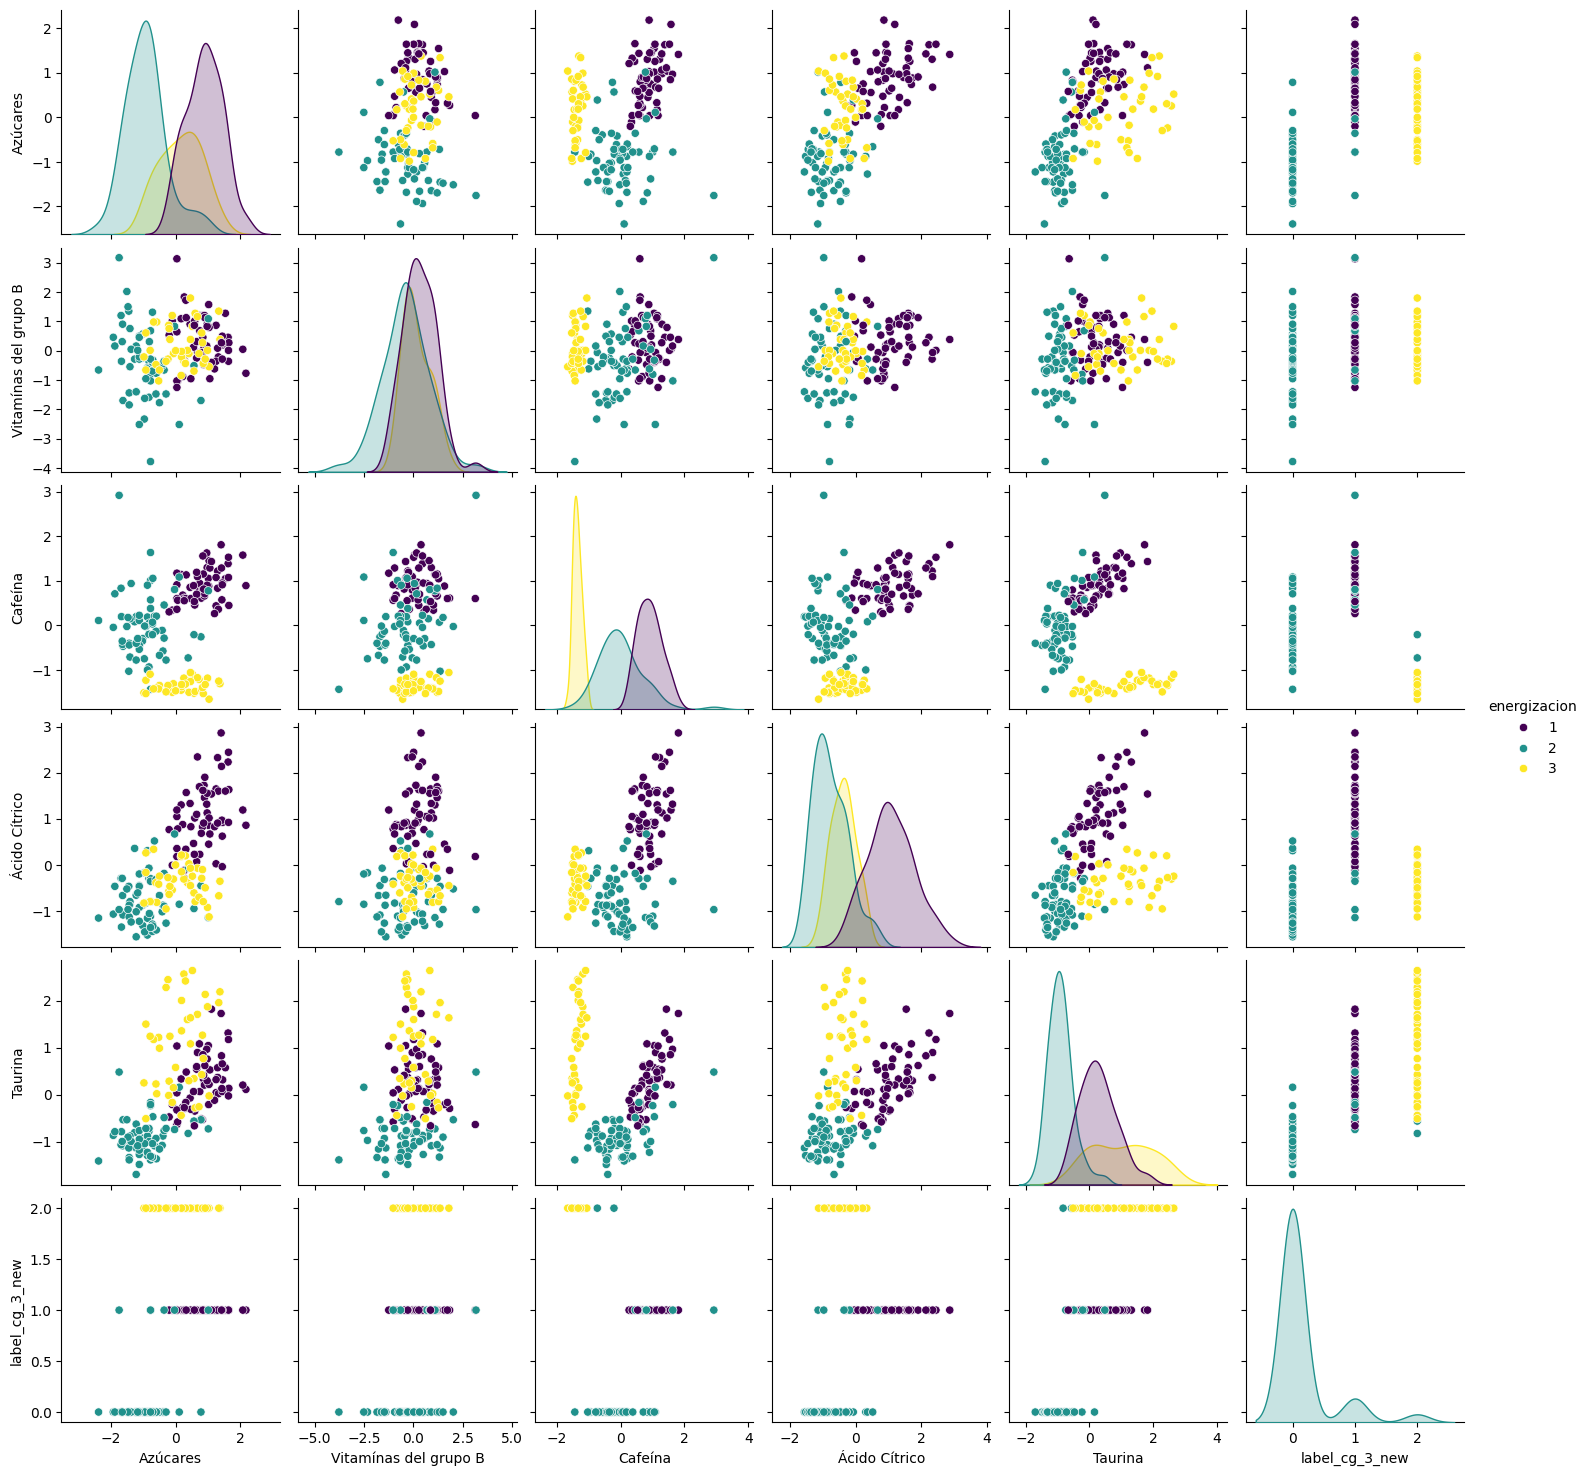

In [126]:
sns.pairplot(df_final, hue="energizacion", palette="viridis");

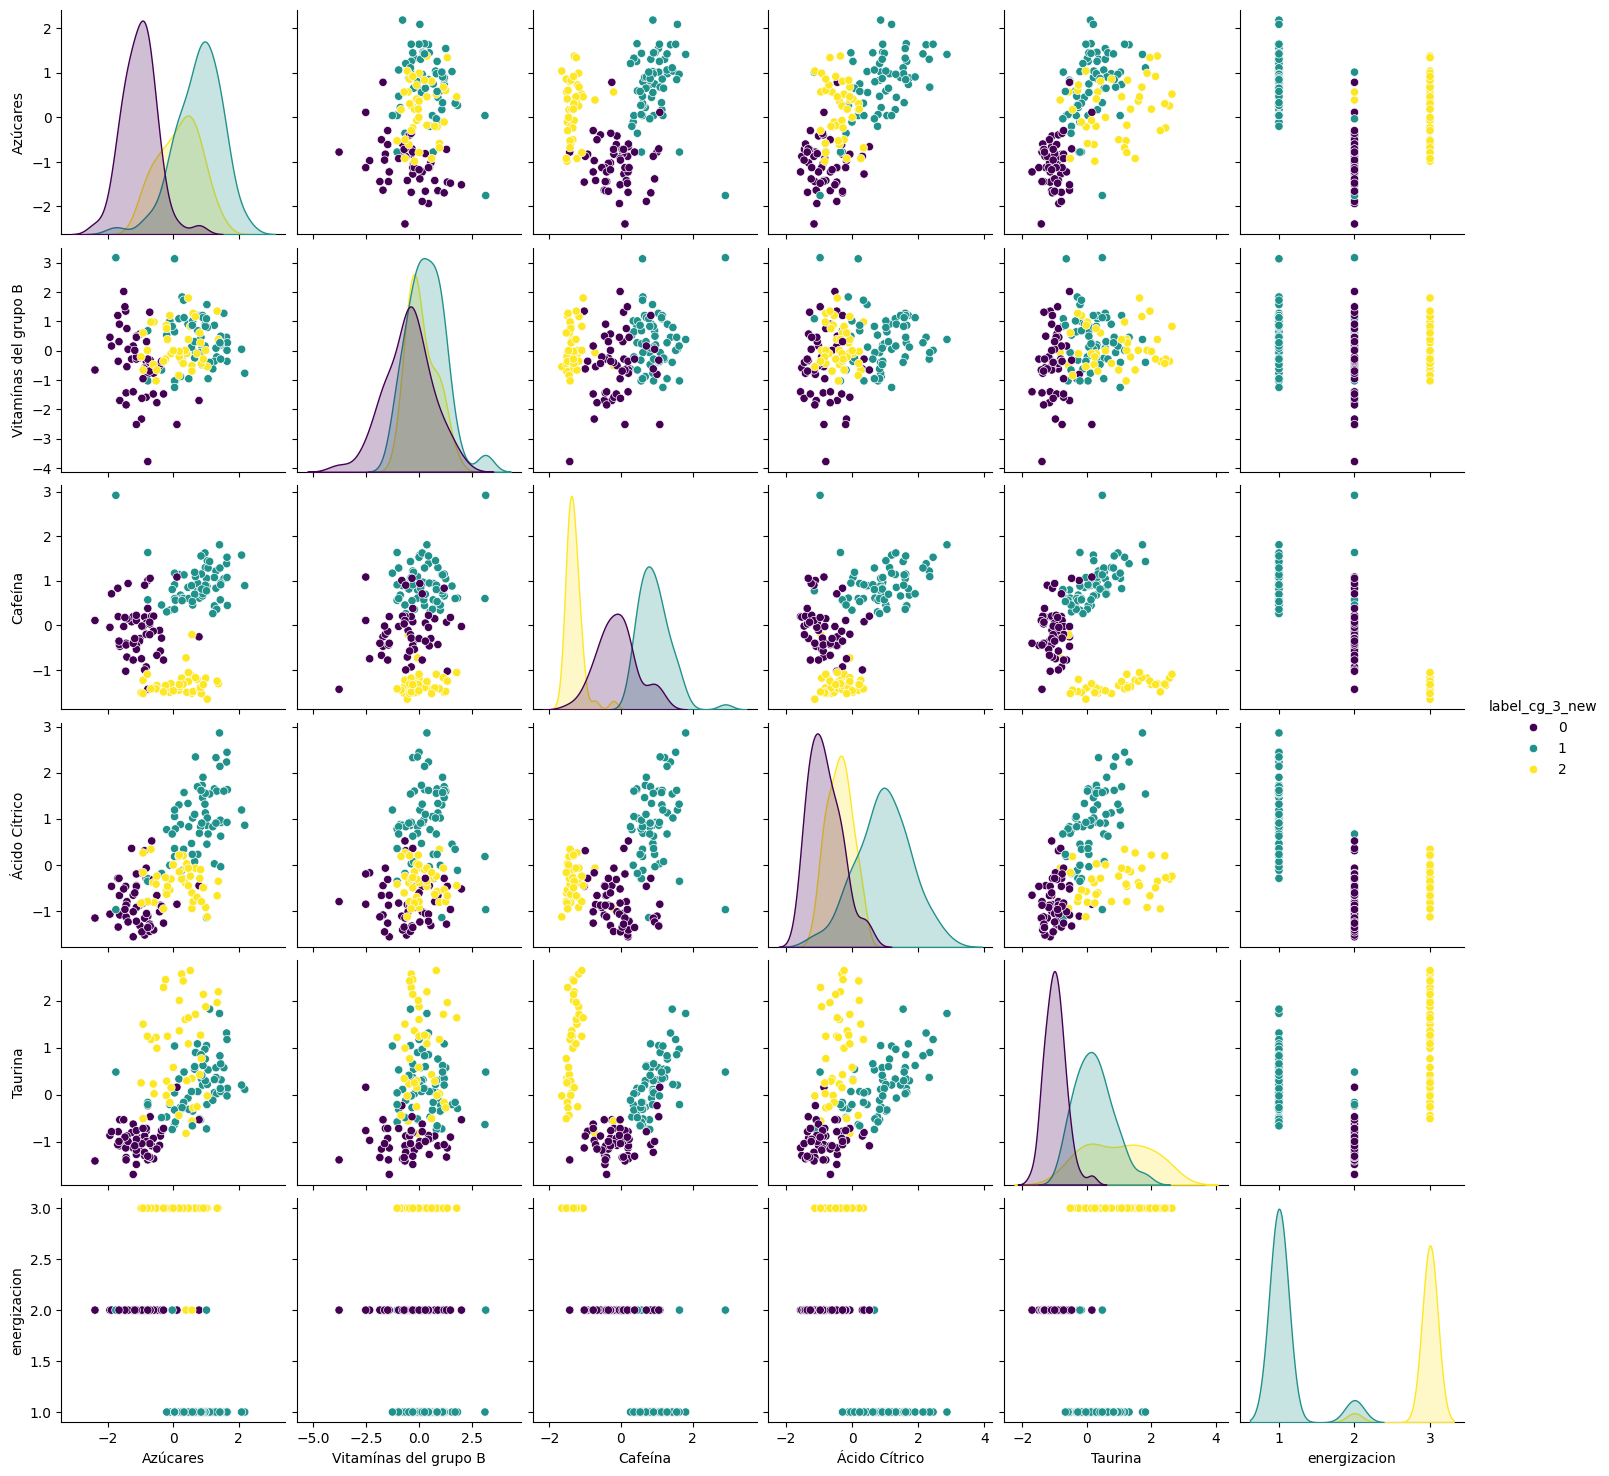

In [127]:
sns.pairplot(df_final, hue="label_cg_3_new", palette="viridis");

In [128]:
# visualmente queda claro que energizacion de tipo 1 corresponde con nuestro segmento label_3 1, pero energizacion 2 corresponde con 0 label_3 y energizacion 3 con label_3 0, tenemos que cambiarlo y analizar las diferencias

df_final.loc[df_final['label_cg_3_new'] == 0, 'label_cg_3_new'] = 2
df_final.loc[df_final['label_cg_3_new'] == 2, 'label_cg_3_new'] = 3

# comprobamos las diferencias detectadas:

differences = df_final[df_final['label_cg_3_new'] != df_final['energizacion']]

print(len(differences))



62


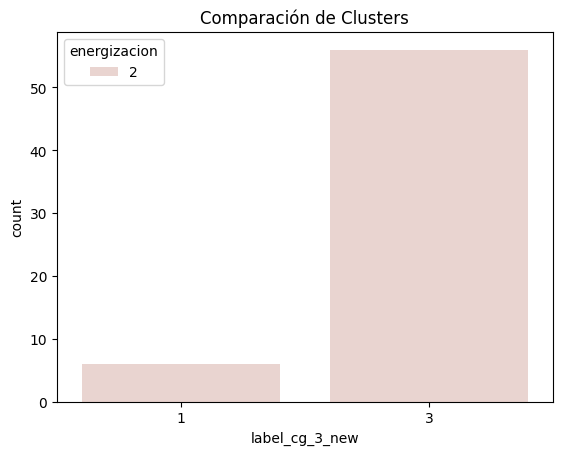

In [129]:
# Visualizar las diferencias con un countplot
sns.countplot(x='label_cg_3_new', hue='energizacion', data=differences )
plt.title("Comparación de Clusters")
plt.show()

In [130]:
# Parece ser que los 62 fallos del modelo son de la bebida de tipo 2 y se han clasificado mayoritariamente como de tipo 3